# 분류(Classification)

- **지도학습**
    - 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- **분류(Classification)**
    - 지도학습의 대표적인 유형
    - 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
    - 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 + 새롭게 관측된 데이터에 대한 레이블을 판별하는 것
- 분류는 다음의 다양한 머신러닝 알고리즘으로 구현 가능
    - **나이브 베이즈(Naive Bayes)**
        - 베이즈(Bayes) 통계와 생성 모델에 기반
    - **로지스틱 회귀(Logistic Regression)**
        - 독립변수와 종속변수의 선형 관계성에 기반
    - **결정 트리(Decision Tree)**
        - 데이터 균일도에 따른 규칙 기반
        - 매우 쉽고 유연하게 적용될 수 있는 알고리즘
        - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
        - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 함 ⇒ 과적합(overfitting)이 발생해 예측 성능이 저하될 수도 있다는 단점 존재 ⇒ 앙상블 기법에서는 오히려 좋음
    - **서포트 벡터 머신(Support Vector Machine)**
        - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
    - **최소 근접(Nearest Neighbor) 알고리즘**
        - 근접 거리를 기준으로 함
    - **신경망(Neural Network)**
        - 심층 연결 기반
        - 딥러닝의 기반
    - **앙상블(Ensemble)**
        - 서로 다른/또는 같은 머신러닝 알고리즘을 결합 (대부분은 동일한 알고리즘을 결합)
        - 일반적으로, 결정 트리를 기본 알고리즘으로 사용
        - 분류에서 가장 각광을 받는 방법 중 하나
        - 매우 많은 여러 개의 약한 학습기를 결합해, 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상
        - 배깅(Bagging) 방식
            - 랜덤 포레스트(Random Forest)
        - 부스팅(Boosting) 방식
            - 그래디언트 부스팅(Gradient Boosting)
            - XgBoost(eXtra Gradient Boosti)
            - LightGBM

⇒ 이번 장에서는 이중에서 앙상블 방법을 집중적으로 다룸!

# 결정 트리(Decision Tree)

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
- 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

## 결정 트리의 구조

- **규칙 노드(Decision Node)**
    - 규칙 조건
- **리프 노드(Leaf Node)**
    - 결정된 클래스 값
- 새로운 규칙 조건마다 **서브 트리(Sub Tree)**가 생성됨
- 데이터 세트에 피처가 있고, 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 생성
- 트리의 **깊이(depth)**가 깊다 = 많은 규칙이 있다 = 분류를 결정하는 방식이 복잡하다 = 과적합으로 이어지기 쉽다 = 결정 트리의 예측 성능 저하
- 적은 노드 + 높은 예측 정확도
    ⇒ 데이터를 분류할 때 **최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록** 결정 노드의 규칙이 정해져야 함
    
- 최대한 균일한 데이터 세트를 구성할 수 있도록 트리를 분할(Split)해야 함

## **균일도**

- 데이터 세트에서 하나의 데이터를 랜덤하게 뽑았을 때, 데이터에 대한 별다른 정보 없이도 데이터를 쉽게 예측할 수 있는 정도
- 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침

- 예시
    - 균일도: C > B > A
    - C: 모두 검은 공 ⇒ 무조건 ‘검은 공’이라고 쉽게 예측할 수 있으므로 균일도가 가장 높음
    - A: 검은 공과 하얀 공의 비율이 비슷 ⇒ 어떤 공인지 예측하기 어려우므로 균일도가 가장 낮음 ⇒ 데이터를 판단하는 데 있어 더 많은 정보가 필요

- 결정 노드는 정보 **균일도가 높은 데이터 세트를 먼저 선택**할 수 있도록 규칙 조건을 만듦
- 정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트로 쪼개는 방식을 자식 트리로 내려가면서 반복

- 예시 : 레고 블럭
    - ‘형태’ 속성: 동그라미, 네모, 세모
    - ‘색깔’ 속성: 노랑, 빨강, 파랑
    - 노랑 블록은 모두 동그라미
    - 빨강/파랑 블록은 동그라미, 네모, 세모의 비율이 비슷
    
    ⇒ 이때, 가장 첫 번째로 만들어져야 하는 규칙은 “if 색깔 == 노랑”

    

## 균일도의 측정 방법

- **정보 이득(Information Gain) 지수**
    - 엔트로피 개념 기반
    - 엔트로피
        - 주어진 데이터 집합의 혼잡도
        - 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
        - 정보 이득 지수 = 1 - 엔트로피 지수
        - 정보 이득 지수가 높다 = 엔트로피 지수가 낮다 = 같은 값이 많이 섞여 있다 = 균일도가 높다
    
    ⇒ **정보 이득 지수가 높은 속성**을 기준으로 분할

    
- **지니 계수**
    - 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
    - 0이 가장 평등 / 1로 갈수록 불평등
    - 지니 계수가 낮다 = 균일도가 높다
    
    ⇒ **지니 계수가 낮은 속성**을 기준으로 분할
    
    - 사이킷런의 **`DecisionTreeClassifier`**는 기본으로 지니 계수를 이용해 데이터 세트를 분할

## 결정 트리 모델의 특징

- **장점**
    - 정보의 ‘균일도’라는 룰을 기반 ⇒ 알고리즘이 쉽고 직관적
    - 정보의 균일도에만 초점 ⇒ 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 불필요
- **단점**
    - 과적합(overfitting) ⇒ 낮은 정확도
        - 모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 많음에도 불구하고, 모델의 예측 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 커짐 ⇒ 과적합된 복잡한 학습 모델 탄생
        - 따라서, 차라리 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 먼저 가정하는 것이 오히려 더 나은 성능을 보장
            
            ⇒ **트리의 크기를 사전에 제한**
           

 

## 결정 트리 파라미터

- 사이킷런의 `DecisionTreeClassifier`와 `DecisionTreeRegressor` 클래스는 결정 트리 알고리즘을 구현
    - `DecisionTreeClassifier` : 분류를 위한 클래스
    - `DecisionTreeRegressor` : 회귀를 위한 클래스
- 사이킷런의 결정 트리 구현은 **CART(Classification And Regression Trees)** 알고리즘 기반
- CART는 분류/회귀 둘 다에서 사용 가능한 트리 알고리즘
- `DecisionTreeClassifier`와 `DecisionTreeRegressor` 의 파라미터
    - **min_samples_split**
        - 노드를 분할하기 위한 최소한의 샘플 데이터 수 ⇒ 과적합 제어
        - 기본값: 2
        - 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가
    - **min_samples_leaf**
        - 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
        - 크게 설정할수록 해당 최소한의 수를 만족하기 어려우므로 노드 분할을 덜 수행 ⇒ 과적합 제어
        - 비대칭적(imbalanced) 데이터의 경우, 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정해야 함
    - **max_features**
        - 최적의 분할을 위해 고려할 최대 피처 개수
        - int 형으로 지정 : 대상 피처의 개수
        - float 형으로 지정 : 전체 피처 중 대상 피처의 퍼센트
        - ‘sqrt’ : 전체 피처 중 sqrt(전체 피처 개수)
        - ‘auto’ : sqrt와 동일
        - ‘log’ : 전체 피처 중 $log_2$(전체 피처 개수)
        - ‘None’ : 전체 피처 (기본값)
    - **max_depth**
        - 트리의 최대 높이
        - 기본값: None (완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 or 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 깊이를 계속 키우며 분할)
        - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할 ⇒ 과적합
    - **max_leaf_lodes**
        - 말단 노드(Leaf)의 최대 개수
    

## 결정 트리 모델의 시각화

- **Graphviz**
    - 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
    - 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 `export_graphviz()` API를 제공
- **export_graphviz()**
    - 학습된 결정 트리 규칙을 실제 트리 형태로 시각화
    - 매개변수
        - 학습이 완료된 Estimator
        - output 파일 명
        - 레이블 이름 리스트
        - 피처의 이름 리스트
    - 반환값
        - Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성

### **붓꽃 데이터 세트 예시**

붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤, 규칙 트리를 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

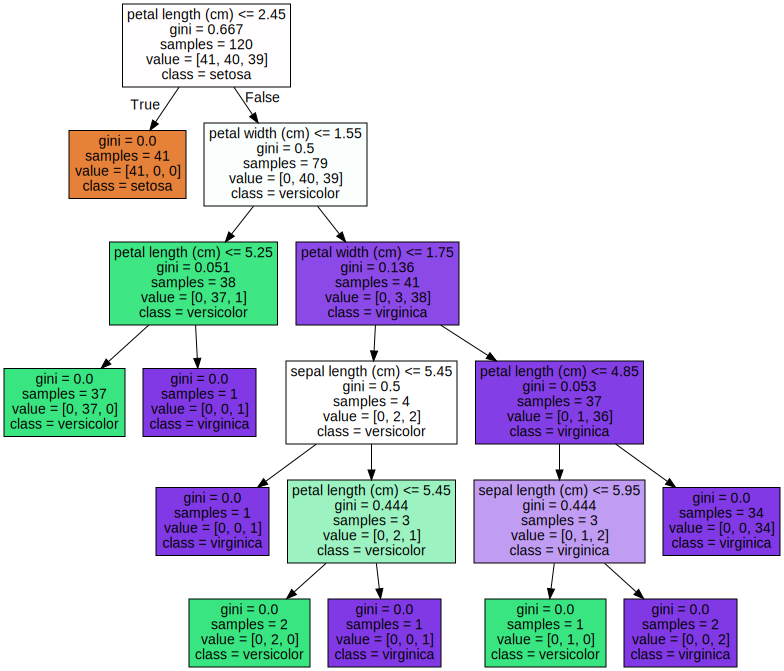

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- **각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미**
    - 주황색(0 : Setosa), 초록색(1 : Vesicolor), 보라색(2 : Virginica)
- **색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미**
- **리프 노드**
    - 더 이상 자식 노드가 없는 노드
    - 최종 클래스(레이블) 값이 결정
    - 오직 하나의 클래스 값으로 최종 데이터가 구성 or 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족
- **브랜치 노드**
    - 자식 노드가 있는 노드
    - 자식 노드를 만들기 위한 분할 규칙 조건을 가짐
- **노드 내에 기술된 지표의 의미**
    - **petal length (cm) <= 2.45**
        - 자식 노드를 만들기 위한 규칙 조건
    - **gini**
        - 다음의 value = []로 주어진 데이터 분포에서의 지니 계수
    - **samples**
        - 전체 데이터 건수
    - **value = []**
        - 클래스 값 기반의 데이터 건수
        - 붓꽃 데이터 세트는 클래스 값으로 0 : Setosa, 1 : Vesicolor, 2 : Virginica 를 가짐 ⇒ value=[41, 40, 39]라면 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성되어 있다는 의미
    - **class = setosa**
        - 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미
- petal length (cm) <= 2.45 규칙이 True로 분기하게 되면 2번 노드 생성
    - 모든 데이터가 Setosa로 결정되므로, 클래스가 결정된 리프 노드가 됨
- petal length (cm) <= 2.45 규칙이 False로 분기하게 되면 3번 노드 생성    
    - petal width (cm) <= 1.55 규칙으로 자식 노드 생성

### 하이퍼 파라미터 변경에 따른 트리 변화

- **max_depth 하이퍼 파라미터 변경에 따른 트리 변화**
    - 트리 깊이가 설정된 max_depth에 따라 줄어들면서, 더 간단한 결정 트리가 됨
- **min_samples_split 하이퍼 파라미터 변경에 따른 트리 변화**
    - min_samples_split=4로 설정
    - 자식 노드로 분할하려면 샘플이 최소 4개 이상 필요하므로, value가 [0, 2, 1]과 [0, 1, 2]로 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드로 확정
- **min_samples_leaf 하이퍼 파라미터 변경에 따른 트리 변화**
    - min_samples_leaf=4로 설정
    - 노드가 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 최소 4개 이상 필요하므로 상대적으로 분할을 적게 수행

## 규칙 조건의 피처 선택

- 결정 트리는 균일도에 기반해 **어떠한 속성을 규칙 조건으로 선택하느냐**가 중요한 요건
- 중요한 몇 개의 피처가 명확한 규칙 트리를 가진, 간결하고 이상치에 강한 모델을 만드는 데 크게 기여
- 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **`feature_importances_`** 속성으로 제공
- **feature_importances**
    - 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현
    - 피처 순서대로 값을 할당
        - 예: [0.01667014 0.02500521 0.03200643 0.92631822]
            
            ⇒ 첫 번째 피처의 피처 중요도는 0.01667014, 두 번째 피처의 중요도는 0.02500521…
            
    - ndarray 형태로 값을 반환

**예시: 붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서의 중요도를 추출**

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

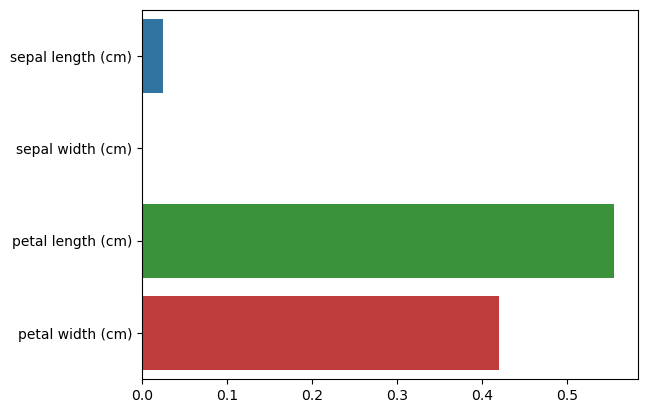

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

⇒ petal_length가 피처 중요도가 가장 높음을 알 수 있음

## 결정 트리 과적합(Overfitting)

- 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **`make_classification()`** 함수를 제공
- **make_classification()**
    - 반환값
        - 피처 데이터 세트
        - 클래스 레이블 데이터 세트

**예시: 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트**

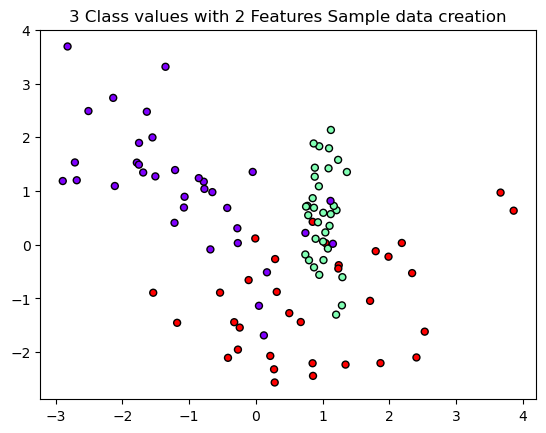

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

- 각 피처가 X, Y축으로 나열된 2차원 그래프
- 색깔로 3개의 클래스 값을 구분
- **visualize_boundary() 함수**
    - 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내, 모델이 어떻게 데이터 세트를 예측 분류하는지 이해를 도움

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

**별다른 제약이 없는(디폴트 하이퍼 파라미터) 결정 트리**

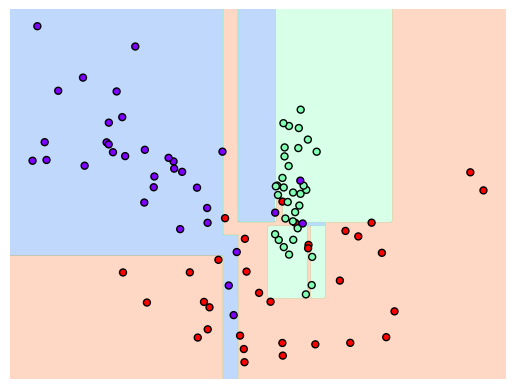

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치(outlier) 데이터까지 분류하기 위해 분할이 자주 발생 ⇒ 결정 기준 경계가 매우 많아짐

**min_samples_leaf 하이퍼 파라미터를 6으로 설정한 결정 트리**

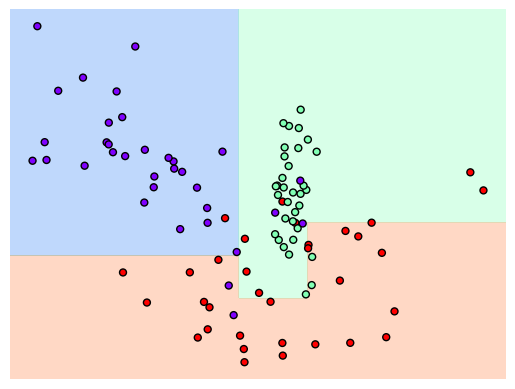

In [8]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서, 좀 더 일반화된 분류 규칙에 따라 분류되었음을 알 수 있음

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

### 사용자 행동 인식(Human Activity Recognition) 데이터 세트

- UCI 머신러닝 리포지토리에서 제공
- 30명에게 스마트폰 센서를 장착한 뒤, 사람의 동작과 관련된 여러 피처를 수집한 데이터
- 수집된 피처 세트를 기반으로 결정 트리를 이용해, 어떠한 동작인지 예측
- **features_info.txt**
    - 피처에 대한 간략한 설명
- **features.txt**
    - 피처의 이름
- **activity_labels.txt**
    - 동작 레이블 값에 대한 설명
- **human_activity/train & human_activity/test**
    - 학습(train) / 테스트(test) 용도의 피처 데이터 세트와 레이블 데이터 세트

**'features.txt’ 파일을 DataFrame으로 로딩해 피처의 명칭 확인**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음 => 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 구성되어 있음

**중복된 피처명을 확인**

In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명이 중복되어 있는 것을 확인

⇒ 신규 버전의 Pandas에서는 Duplicate name 에러가 발생

**중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여**

In [11]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

### **학습용/테스트용 피처 데이터 세트와 레이블 데이터 세트를 로드**

- 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv()의 sep 인자로 공백 문자를 입력
- 레이블의 칼럼은 ‘action’으로 명명

In [12]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

**학습용 피처 데이터 세트 확인**

In [13]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 학습 데이터 세트는 7352개의 레코드, 561개의 피처를 보유
- 피처가 전부 float 형의 숫자형이므로 카테고리 인코딩은 불필요

**학습용 레이블 데이터 세트 확인**

In [14]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값
- 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있음

### **DecisionTreeClassifier를 이용해 동작 예측 분류를 수행**

- DecisionTreeClassifier의 하이퍼 파라미터를 모두 디폴트 값으로 설정했을 경우

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### **GridSearchCV를 이용해 max_depth의 변화에 따른 예측 성능 확인**

- min_samples_split은 16으로 고정
- max_depth를 6, 8, 10, 12, 16, 20, 24로 계속 늘리면서 예측 성능을 측정
- 교차 검증은 5개 세트

In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


- 5개의 CV 세트에서 max_depth 값에 따른 예측 성능 변화를 GridSearchCV 객체의 **`cv_results_`** 속성을 통해 확인
    - **`cv_results`** 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있음

In [17]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- mean_test_score는 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치
    
    ⇒ 결정 트리가 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 더욱 복잡한 모델이 됨 ⇒ 과적합으로 인한 성능 저하

**테스트 데이터 세트에서 max_depth의 변화에 따른 예측 성능 확인**

In [18]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]

# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


- max_depth가 8일 경우 약 87.17%로 가장 높은 정확도
- 깊이가 깊어질수록 테스트 데이터 세트의 정확도가 점점 떨어짐 ⇒ 과적합의 영향력이 커짐
    
    ⇒ 따라서, 하이퍼 파라미터를 이용해 깊이를 제어

**max_depth와 min_samples_split의 변화에 따른 예측 성능 확인**

In [19]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


**테스트 데이터 세트에서 예측 수행**

In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


**결정 트리에서 각 피처의 중요도 확인**

feature_importances_ 속성을 이용

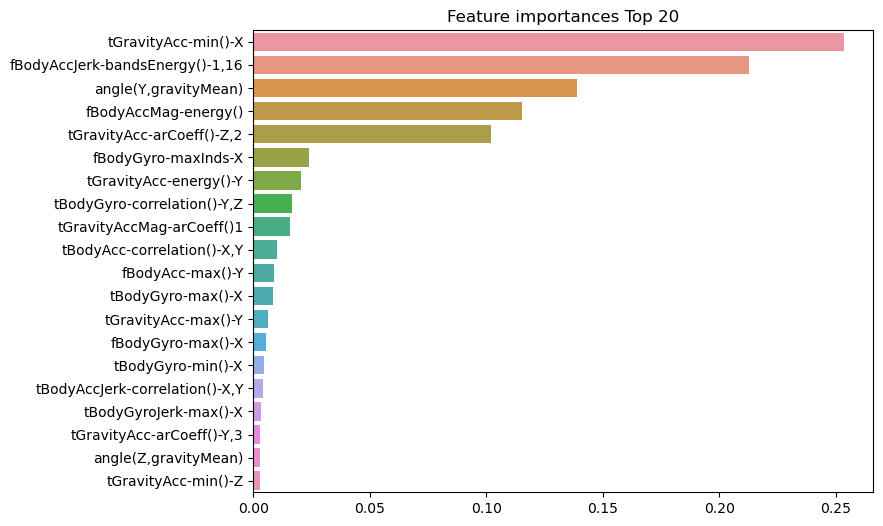

In [21]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

가장 높은 중요도를 가진 Top 5의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있는 것을 확인

# 앙상블 학습

## **앙상블 학습(Ensemble Learning)**

- 여러 개의 분류기(Classifier)를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻어냄
- 비정형 데이터(이미지, 영상, 음성)의 분류에서는 딥러닝이 뛰어난 성능을 보이지만, 대부분의 정형 데이터의 분류에서는 앙상블이 뛰어난 성능을 나타냄

## 유형

- **보팅(Voting)**
    - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 서로 다른 알고리즘을 가진 분류기를 결합
- **배깅(Bagging)**
    - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행
    - 대부분 결정 트리 알고리즘 기반
    - 대표적인 배깅 방식 : **랜덤 포레스트 알고리즘**
- **부스팅(Boosting)**
    - 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행
    - 대부분 결정 트리 알고리즘 기반
    - 대표적인 부스팅 방식 : **그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)**
- **스태킹**
    - 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

## 보팅(Voting)

- 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 서로 다른 알고리즘을 가진 분류기를 결합

### 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting) 방법이 존재
- **하드 보팅(Hard Voting)**
    - 다수결 원칙
    - 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- **소프트 보팅(Soft Voting)**
    - 분류기들의 레이블 값 결정 확률을 모두 더하고, 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
- 일반적으로 소프트 보팅이 하드 보팅보다 예측 성능이 좋아 더 많이 사용됨

### 보팅 분류기(Voting Classifier)

- 사이킷런은 보팅 방식의 앙상블을 구현한 **`VotingClassifier`** 클래스 제공
- **VotingClassifier**
    - 매개변수
        - estimators : 리스트 값으로, 보팅에 사용될 여러 개의 Classifier 객체들의 튜플 형식
        - voting 값 : ‘hard’(기본값) 또는 ‘soft’
- 예시 : 위스콘신 유방암 데이터 세트를 예측 분석
    - 위스콘신 유방암 데이터 세트
        - 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
        - 종양의 크기, 모양 등의 형태와 관련한 많은 피처를 가짐
        - 사이킷런의 `load_breast_cancer()` 함수를 통해 데이터 세트 생성 가능

**모듈 및 데이터 로딩**

In [22]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

**VotingClassifier 클래스를 이용해 보팅 분류기 생성**

In [23]:
# 개별 모델은 로지스틱 회귀와 KNN 임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음 → 오히려 기반 분류기의 성능이 더 나을 수도 있음
- 하지만, 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도, 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성됨
    
    ⇒ 앙상블 방법은 전반적으로 단일 ML 알고리즘보다 뛰어난 예측 성능을 가짐
    
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로, 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가 요소
    
    ⇒ 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제

## **배깅(Bagging)**

- 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 여러 개의 결정 트리 분류가 전체 데이터에서 **배깅** 방식으로 **각자의 데이터를 샘플링해 개별적으로 학습**을 수행한 뒤, 최종적으로 모든 분류기가 **보팅**을 통해 예측 결정을 수행
- **부트스트래핑(Bootstrapping) 분할 방식** : 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터
- 대표적인 배깅 방식 : **랜덤 포레스트 알고리즘**

### 랜덤 포레스트

- **결정 트리** 기반 알고리즘
- 빠른 수행 속도, 다양한 영역에서 높은 예측 성능
- 사이킷런은 **`RandomForestClassifier`** 클래스를 통해 랜덤 포레스트 기반의 분류를 지원
- 예시 : 사용자 행동 인식 데이터 세트

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많다는 것 ⇒ 튜닝을 위한 시간이 많이 소모
- 그나마 랜덤 포레스트가 적은 편
- **랜덤 포레스트 하이퍼 파라미터**
    - **n_estimators**
        - 결정 트리의 개수 (기본값 : 10)
    - **max_features**
        - 결정 트리에 사용된 max_features 파라미터와 동일
        - 기본값은 ‘auto’, 즉 ‘sqrt’
    - **max_depth, min_samples_leaf, min_samples_split**
        - 결정 트리에 사용된 파라미터와 동일

**GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝**

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


**테스트 데이터에서 예측 성능을 측정**

In [26]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


**feature_importances 속성을 이용해 알고리즘이 선택한 피처의 중요도 확인**

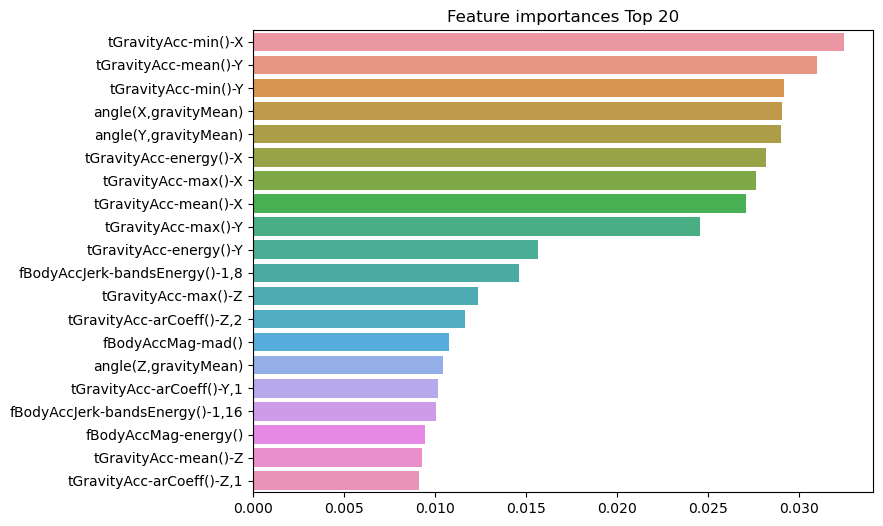

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

## **부스팅(Boosting)**

- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 대표적인 구현으로 에이다 부스트(AdaBoost)와 GBM(Gradient Boosting Machine)이 존재
    
    

### **에이다 부스트(AdaBoost)**

- 오류 데이터에 가중치를 부여하면서 부스팅을 수행
- STEP 0 : +와 -로 구성된 데이터셋이있고, 이를 분류
- STEP 1.  분류 기준 1로 해당 데이터를 분류
- STEP 2 : - class 로 잘못 분류된 3개의 + 데이터(오류)에 대해 가중치를 부여
- STEP 3 : 이 가중치가 반영되어서 분류 기준 2로 데이터를 분류
- STEP 4 : + class 로 잘못 분류된 3개의 - 데이터(오류)에 대해 가중치를 부여
- STEP 5 : 이 가중치가 반영되어서 분류 기준 3으로 데이터를 분류
- STEP 6 : 최종적으로는 분류 기준 1, 2, 3 각각에 가중치를 부여하고 결합하여 분류가 이루어짐

### GBM(Gradient Boost Machine)

- AdaBoost와 비슷하나 가중치 업데이트에 경사 하강법(Gradient Descent)을 이용한다는 것에서 차이점 존재
- 과적합에도 강한, 뛰어난 예측 성능을 가진 알고리즘
- 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력이 더 필요하다는 단점 존재
- **경사 하강법(Gradient Descent)**
    - $y$ : 분류의 실제 결과값
    - $x_1, x_2, …, x_n$ : 피처
    - $F(x)$ : 피처에 기반한 예측 함수
    - 오류식 $h(x)=y−F(x)$
    
    ⇒ 오류식 $h(x)=y−F(x)$ 을 최소화하는 방향으로 반복적으로 가중치 값을 업데이트
    
- 회귀도 가능
- 사이킷런은 GBM 기반의 분류를 위해 `GradientBoostingClassifier` 클래스 제공
- **GBM 하이퍼 파라미터**
    - **loss**
        - 경사 하강법에서 사용할 비용 함수 지정 (기본값 : ‘deviance’)
    - **learning_rate**
        - GBM이 학습을 진행할 때마다 적용하는 학습률
        - weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
        - 0~1 사이의 값을 지정할 수 있음 (기본값 : 0.1)
    - **n_estimators**
        - weak learner의 개수 (기본값 : 100)
    - **subsample**
        - weak learner가 학습에 사용하는 데이터의 샘플링 비율 (기본값 : 1)
    - **max_features, max_depth, min_samples_leaf, min_samples_split**
        - 결정 트리에 사용된 파라미터와 동일

예시 : 사용자 행동 인식 데이터 세트

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

- 기본 하이퍼 파라미터만으로도 93.89%의 예측 정확도
    
    ⇒ 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어남

**GridSearchCV로 GBM의 하이퍼 파라미터 튜닝을 수행하는 예제**

In [ ]:
### 사이킷런이 1.X로 업그레이드 되며 GBM의 학습 속도가 현저하게 저하되는 문제가 발생 
### 아래는 수행 시간이 오래 걸리므로 참고용으로만 사용 

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## XGBoost(eXtra Gradient Boost)

- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- GBM에 기반하고 있지만, GBM의 단점을 해결
- 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료
- 주요 장점
    - 뛰어난 예측 성능
    - GBM 대비 빠른 수행 시간
    - 과적합 규제(Regularization)
    - Tree pruning(나무 가지치기)
    - 자체 내장된 교차 검증
    - 결손값 자체 처리
- XGBoost의 파이썬 패키지명은 “xgboost”
    - xgboost 파이썬 패키지 출시 초기에는 사이킷런과 호환되지 않는 독자적인 XgBoost 프레임워크 기반의 패키지였음
        
        ⇒ 사이킷런의 fit(), predict() 메서드 같은 기능 이용 불가
        
    - 이후 사이킷런과 연동할 수 있는 래퍼 클래스(Wrapper class)를 제공
        - **`XGBClassifier`**, **`XGBRegressor`**
        
        ⇒ 사이킷런의 fit(), predict()와 같은 다양한 기능 이용 가능
        

### 파이썬 래퍼 XGBoost

- 사이킷런과 호환되지 않는 초기의 독자적인 XgBoost 프레임워크 기반
- GBM과 유사한 하이퍼 파라미터를 동일하게 가짐
- 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가
- **파이썬 래퍼 XGBoost 하이퍼 파라미터**
    - 일반 파라미터: 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터
    - 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터
    - 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
    - 대부분의 하이퍼 파라미터는 **Booster** 파라미터에 속함
- 주로 **딕셔너리** 형태로 입력
- **과적합 문제가 심각할 경우 다음과 같이 파라미터를 튜닝**
    - eta 값을 낮춘다(0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 한다.
    - max_depth 값을 낮춘다.
    - min_child_weight 값을 높인다.
    - gamma 값을 높인다.
    - subsample과 colsample_bytree를 조정한다.
- XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 지님
- 기존 GBM의 느린 수행 속도를 향상시키기 위한 **Early Stopping(조기 중단)** 기능
    - 기본 GBM의 경우, n_estimators에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하면서 중간에 반복을 멈출 수 없고 지정된 횟수를 전부 완료
    - XGBoost의 경우, n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 중지 ⇒ 수행 시간 개선
    - 예시 : n_estimators를 200으로 설정, 조기 중단 파라미터 값을 50으로 설정
        - 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습 오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료

**XGBoost의 버전 확인**

In [ ]:
import xgboost

print(xgboost.__version__)

### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

- **XGBoost의 파이썬 패키지인 xgboost**
    - 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화(plotting) 기능을 포함
    - 조기 중단 기능이 있어서 num_rounds로 지정한 부스팅 반복 횟수에 도달하지 않더라도 더 이상 예측 오류가 개선되지 않으면 반복을 중단 ⇒ 수행 시간 개선
- **위스콘신 유방암 데이터 세트**
    - 유방암의 악성 종양(malignant), 양성 종양(benign) 여부를 결정하는 이진 분류 데이터 세트
    - 종양의 크기, 모양 등의 형태와 관련한 많은 피처를 가짐
    - 사이킷런의 `**load_breast_cancer()**` 함수를 통해 데이터 세트 생성 가능

**모듈 및 데이터 로딩**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label

- 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어 있음
- 타깃 레이블 값의 종류는 악성인 ‘malignant’가 0, 양성인 ‘benign’이 1 값

**레이블 값의 분포 확인**

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

- 1값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성

**학습용 데이터 세트와 테스트용 데이터 세트를 분리한 뒤, 학습용 데이터 세트에서 검증용 데이터 세트를 분리**

- 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용
- 위에서 만든 80% 학습용 데이터에서 90%는 학습용, 10%는 검증용 데이터로 다시 분리

In [ ]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임 => Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습용, 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

- 파이썬 래퍼 XGBoost의 사이킷런과의 차이점
    - XGBoost만의 전용 데이터 객체인 **DMatrix**를 사용
        
        ⇒ Numpy 또는 Pandas로 되어 있는 학습용, 검증, 테스트용 데이터 세트를 모두 DMatrix로 생성하여 모델에 입력해야 함
        
    - **DMatrix의 주요 입력 파라미터**
        - data : 피처 데이터 세트
        - label : 레이블 데이터 세트(분류) / 숫자형 종속값 데이터 세트 (회귀)
    - 구버전 XGBoost는 Numpy를 입력 파라미터로 받아서 DMatrix로 변환
    - 현버전 XGBoost는 Numpy,외에도 DataFrame, Series, libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 입력받아 DMatrix로 변환 가능

In [ ]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우
# X_train.values로 넘파이로 일차 변환한 뒤 DMatrix로 변환
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

- **XGBoost의 하이퍼 파라미터 설정**
    - max_depth(트리 최대 깊이) : 3
    - 학습률 eta : 0.1
    - 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binary:logistic)
    - 오류 함수의 평가 성능 지표는 logloss
    - num_rounds(부스팅 반복 횟수) : 400회

In [ ]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

- 하이퍼 파라미터를 xgboost 모듈의 **`train()`** 함수에 파라미터로 전달하여 학습을 수행
- **조기 중단**
    - 조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용
    - XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능 제공
    - xgboost의 train() 함수에 early_stopping_rounds 파라미터를 입력하여 설정
    - 이때, 반드시 평가용 데이터 세트 지정과 `eval_metric`을 함께 설정해야 함
        
        ⇒ xgboost는 반복마다 지정된 평가용 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정하기 때문
        
        - 예를 들어, dtr이 학습용, dval이 평가용이라면 [(dtr, ‘train’), (dval, ‘eval’)]과 같이 학습용 DMatrix는 ‘train’으로, 평가용 DMatrix는 ‘eval’로 개별 튜플로 명기
            
            ⇒ 현버전 XGBoost는 평가용 데이터 세트만 명기해줘도 성능 평가를 수행하므로 [(dval, ‘eval’)]로 설정해도 무방
            
        - **`eval_metric`** : 평가 세트에 적용할 성능 평가 방법 (분류일 경우 주로 ‘error’, ‘logloss’를 적용)

**`train()` 를 통해 학습 수행**

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

- train()으로 학습을 수행하면서 반복 시마다 `train_logloss`와 `eval_logloss`가 지속적으로 감소하고 있는 것을 확인
- num_boost_round를 500회로 설정했음에도 학습은 176번째 반복에서 완료
    
    ⇒ 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값이 0.25587보다 낮아지지 않았기 때문에 더 이상 반복하지 않고 중단
    

**`predict()` 를 통해 테스트 데이터 세트에서 예측을 수행**

- 사이킷런의 predict() 메서드는 예측 결과 클래스 값을 반환하는 데 반해, xgboost의 predict()는 예측 결괏값이 아닌 **예측 결과를 추정할 수 있는 확률 값**을 반환

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

**get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능 평가**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 테스트 실제 레이블 값, 예측 레이블, 예측 확률을 인자로 입력
get_clf_eval(y_test , preds, pred_probs)

- **xgboost의 `plot_importance()` 시각화 기능**
    - **피처의 중요도**를 막대그래프 형식으로 나타냄
    - f스코어를 기반으로 해당 피처의 중요도를 나타냄
        - f스코어: 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지
    - 파라미터
        - 학습이 완료된 모델 객체
        - matplotlib의 ax 객체
    - xgboost를 DataFrame이 아닌 **넘파이** 기반의 피처 데이터로 학습 시에는 넘파이에서 피처명을 제대로 알 수 없으므로 **Y축의 피처명 나열 시 f0, f1과 같이 피처 순서 별로 f자 뒤에 순서를 붙여** 피처명을 나타내야 함

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

- **xgboost의 `to_graphviz()` 기능**
    - **트리 기반 규칙 구조**를 시각화 가능
    - 파라미터
        - 학습이 완료된 모델 객체
        - Graphviz가 참조할 파일명
- **xgboost의 `cv()` 기능**
    - GridSearchCV와 유사하게, 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 제공
    - 반환값은 DataFrame 형태
    - 파라미터
        - params : 부스터 파라미터 (dict)
        - dtrain : 학습 데이터 (DMatrix)
        - num_boost_round : 부스팅 반복 횟수 (int)
        - nfold : CV 폴드 개수 (int)
        - stratified : CV 수행 시 층화 표본 추출 수행 여부 (bool)
        - metrics : CV 수행 시 모니터링할 성능 평가 지표 (string 또는 list of strings)
        - early_stopping_rounds : 조기 중단을 활성화시킴 (반복 횟수 지정) (int)

### 사이킷런 래퍼 XGBoost

- 사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스를 개발
- 사이킷런의 기본 Estimator를 그대로 상속 ⇒ fit(), predict() 만으로 학습과 예측 가능
- GridSearchCV, Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능
- 분류를 위한 래퍼 클래스 **`XGBClassifier`**, 회귀를 위한 래퍼 클래스 **`XGBRegressor`**
- **XGBClassifier의 하이퍼 파라미터**
    - 기존의 xgboost 모듈에서 사용하던 파라미터 몇 개를 다음과 같이 변경
        - eta → learning_rate
        - sub_sample → subsample
        - lambda → reg_lambda
        - alpha → reg_alpha

예시 : 위스콘신 유방암 데이터 세트

- **XGBClassifier를 생성하고 학습과 예측을 수행**

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGCBlassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# get_clf_eval()을 이용해 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

- 앞 예제의 파이썬 XGBoost보다 더 좋은 평가 결과
    
    ⇒ 워낙 위스콘신 데이터 세트의 개수가 작아, 이전에는 조기 중단을 위해 최초 학습 데이터인 X_train을 다시 학습용 X_tr과 검증용 X_val로 분리하면서 최종 학습 데이터 건수가 작아졌었기 때문
    

**XGBoost에서 조기 중단을 수행**

- 조기 중단 관련 파라미터를 **`fit()`**에 입력
- 조기 중단 관련 파라미터
- early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수를 정의
- eval_metric : 조기 중단을 위한 평가 지표
- eval_set : 성능 평가를 수행할 데이터 세트

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

- 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼
    
    ⇒ 아직 성능이 향상될 여지가 있는데도 반복이 멈춰 버려서 충분한 학습이 되지 않기 때문

**early_stopping_rounds를 10으로 설정하고 재학습**

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

**plot_importance()를 통해 피처의 중요도를 시각화**

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)